## 1. Alexnet
AlexNet은 2012년 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승한 딥러닝 모델로, 딥러닝의 대중화를 이끈 중요한 합성곱 신경망(CNN)입니다. 이 모델은 8개의 레이어(5개의 합성곱 레이어와 3개의 완전 연결 레이어)로 구성되어 있으며, ReLU 활성화 함수, 드롭아웃(dropout), 데이터 증강(data augmentation) 등을 사용해 과적합을 방지하고 학습 성능을 향상시켰습니다. AlexNet은 대규모 데이터셋과 GPU 병렬 연산을 활용해 1,000개의 클래스 분류 문제에서 top-1, top-5 error rates가 각각 17.5%,37.5% 로 뛰어난 성능을 보여, 컴퓨터 비전에서 딥러닝이 표준 기법으로 자리 잡는 데 기여했습니다. 이 성과는 당시 기준으로 매우 뛰어난 결과였습니다. 특히 AlexNet은 이전에 사용된 전통적인 머신러닝 방법론보다 훨씬 큰 차이로 성능을 끌어올리며, 딥러닝의 가능성을 보여주었습니다.
[논문 링크](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

<img src="https://blog.kakaocdn.net/dna/ZhU3r/btsPB5Lufko/AAAAAAAAAAAAAAAAAAAAAHa6U1GP5xY40-Xe9MNjpYzvgjLZQqjVvISNhemgv8gN/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1753973999&allow_ip=&allow_referer=&signature=pLALmlFEQ%2BwmyZ503UtIu3MYIzE%3D">

### ※ ImageNet LSVRC

ImageNet LSVRC는 Large Scale Visual Recognition Challenge의 약자로, 이미지 인식 및 분류 기술을 겨루는 대회입니다. 2010년부터 매년 개최되었으며, ImageNet이라는 대규모 이미지 데이터셋을 기반으로 참가자들이 다양한 모델을 설계하고 경쟁했습니다.

- ImageNet 데이터셋: 약 1400만 장의 이미지를 포함하며, 1000개의 클래스(예: 고양이, 강아지, 자동차 등)로 분류된 대규모 이미지 데이터셋입니다.
- 목적: 컴퓨터 비전 및 딥러닝 기술의 발전을 촉진하고, 이미지 인식 분야에서 혁신적인 기술을 발견하는 것이 목표였습니다.
- LSVRC-2010: 이 대회에서 AlexNet이 2012년에 처음으로 딥러닝 기반 접근법을 사용해 뛰어난 성능을 보여줌으로써 딥러닝의 새로운 시대를 열었습니다.

### ※ Error Rate

이미지 분류 모델의 성능을 평가하는 지표로, 모델이 이미지를 얼마나 정확히 분류했는지를 나타냅니다.



1. Top-1 Error Rate

    - 모델이 예측한 가장 높은 확률의 클래스(Top-1)가 정답이 아닐 확률입니다.
    - 예를 들어, 이미지에 "고양이"가 있고, 모델이 가장 높은 확률로 "강아지"라고 예측했다면, 이건 Top-1 에러입니다.​

2. Top-5 Error Rate

    - 모델이 예측한 상위 5개의 클래스 중 하나라도 정답에 포함되지 않았을 확률입니다.
    - 예를 들어, 이미지가 "고양이"인데 모델이 "강아지", "토끼", "고양이", "호랑이", "여우"를 상위 5개로 예측했다면, 이건 정답으로 간주됩니다.
    - Top-5를 사용하는 이유: 사람이 보기에 유사한 클래스(예: 치타와 표범)를 분류하는 것은 어렵기 때문에, 상위 5개 중에 정답이 있는지를 확인하는 방식으로 보다 실용적인 성능을 평가합니다.

## 2. glasses vs noglasses 분류하기
경로 : /content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass.zip"

### 3. Alexnet 직접 구현(glass 데이터셋 사용)

In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
# glob : 파일 경로를 패턴으로 검색할 수 있게 해주는 함수
import glob
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import transforms
from PIL import Image
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/

/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data


In [3]:
# !unzip -qq glass.zip

replace glass/test/noglasses/row-7-column-6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
def display_images_center_crop(image_paths,title,max_images=4):
    plt.figure(figsize=(12,3))
    for i, image_path in enumerate(image_paths[:max_images]):
        image = Image.open(image_path)
        width,height = image.size

        # 이미지 중앙의 정사각형 영역을 계산
        new_edge_length = min(width,height)
        left = (width - new_edge_length) / 2
        top = (height - new_edge_length) / 2
        right = (width + new_edge_length) / 2
        bottom = (height + new_edge_length) / 2

        # 중앙 영역 크롭
        image_cropped = image.crop((10, 20, width-10, height-15))

        # 크롭된 이미지 시각화
        plt.subplot(1,max_images,i+1)
        plt.imshow(image_cropped)
        plt.title(title)
        plt.axis('off')
    plt.show()

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-3-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-4-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-1-column-7.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-2-column-8.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-2-column-6.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-3-column-1.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-1-column-5.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/glasses/row-4-column-12.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/g

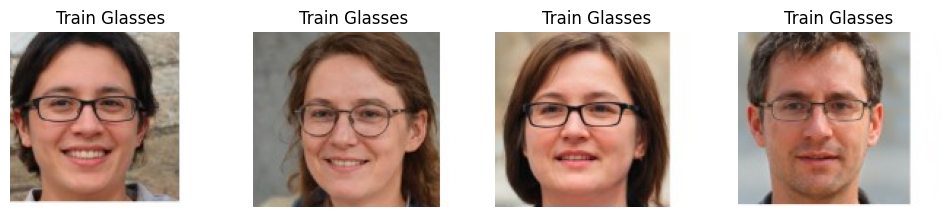

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-9-column-10.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-7-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-10-column-1.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-9-column-11.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-11-column-1.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-9-column-7.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-9-column-4.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train/noglasses/row-9-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL

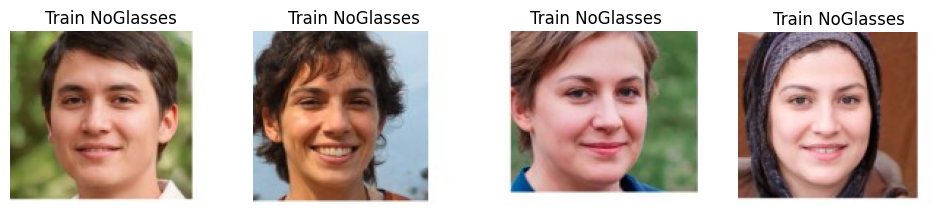

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-5-column-6.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-6-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-6-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-5-column-7.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-6-column-12.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-5-column-11.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-5-column-5.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-6-column-1.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/glasses/row-6-colu

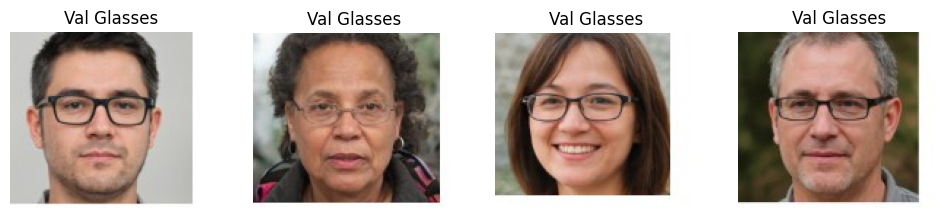

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-12.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-4.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-10.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-11-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-11.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val/noglasses/row-12-column-2.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/gla

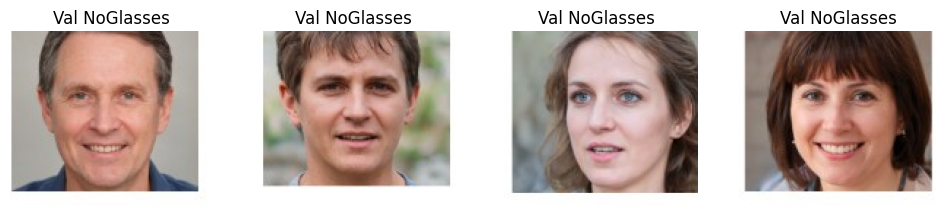

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-5.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-7.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-2.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-4.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-8.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-1.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row-1-column-9.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses/row

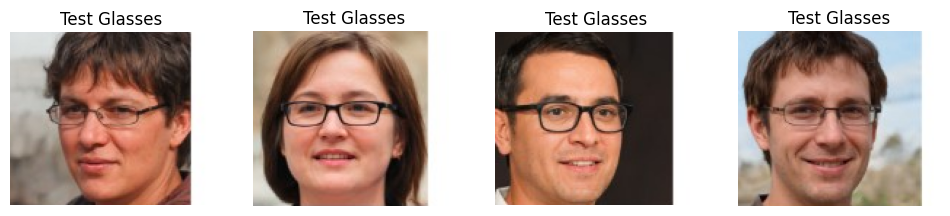

['/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-7.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-10.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-3.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-4.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-6.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-8.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-5.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses/row-7-column-2.jpg', '/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass

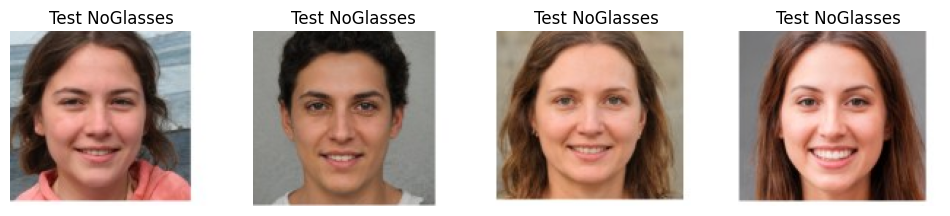

In [6]:
categories=['Train Glasses','Train NoGlasses','Val Glasses', 'Val NoGlasses','Test Glasses','Test NoGlasses']

for category in categories:
    # glob : 파일 경로를 패턴으로 검색할 수 있게 해주는 함수
    image_paths = glob.glob(f'/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/{category.lower().replace(" ","/")}/*')
    print(image_paths)
    display_images_center_crop(image_paths, category)

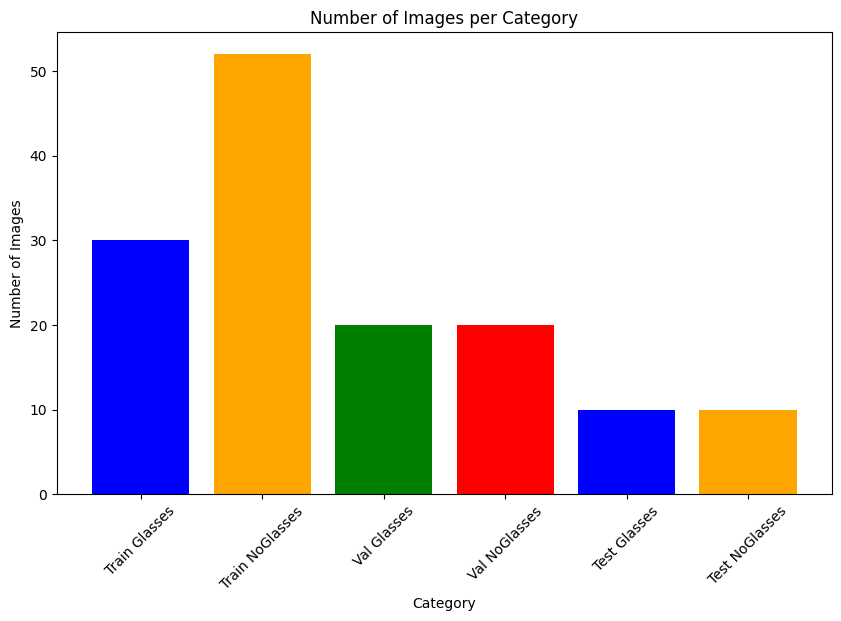

In [7]:
plt.figure(figsize=(10,6))
plt.bar(categories, [len(glob.glob(f'/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/{category.lower().replace(" ","/")}/*')) for category in categories],
        color=['blue','orange','green','red'])
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

## 전처리

In [8]:
transform = transforms.Compose([
    transforms.CenterCrop(128),     # 이미지 중앙을 기준으로 128 * 128 크기로 자름
    transforms.Resize((227,227)),   # Alexnet에는 무조건 227 사이즈
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    # 밝기, 대비, 채도 , 색조
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    # ---- 여기까지 증강 ----
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [9]:
train_dataset = ImageFolder('/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/train',transform = transform)
val_dataset = ImageFolder('/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/val', transform = transform)

train_loader = DataLoader(train_dataset,batch_size=4,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=4,shuffle=False)

In [10]:
from re import X
class AlexNet(nn.Module):
    def __init__(self,num_classes=1000):
        super(AlexNet,self).__init__()

        # Convolutional Layer
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4)     # torch.Size([1, 96, 55, 55])

        # Max Pooling Layer
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)        # torch.Size([1, 96, 27, 27])
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding="same")   # torch.Size([1, 256, 27, 27])
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding="same")  # torch.Size([1, 384, 13, 13])
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding="same")  # torch.Size([1, 384, 13, 13])
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding="same")  # torch.Size([1, 256, 6, 6])

        # Fully Connected Layer
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        # 히든 레이어
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self,x):
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.maxpool(F.relu(self.conv5(x)))

        x = x.view(x.size(0), 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [11]:
model = AlexNet(num_classes=2)
model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [13]:
# 정확도 계산함수
def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,1)
            # 전체 라벨 개수 세기
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        return 100 * correct / total

In [15]:
train_losses = []
val_losses = []

val_accuracies = []

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss)

    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    val_accuracy = calculate_accuracy(val_loader, model)
    val_accuracies.append(val_accuracy)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}, Val Acc: {val_accuracy:.2f}%')

print('학습 및 검증 완료!')

Epoch 1, Train Loss: 0.673679, Val Loss: 0.695457, Val Acc: 50.00%
Epoch 2, Train Loss: 0.662011, Val Loss: 0.720891, Val Acc: 50.00%
Epoch 3, Train Loss: 0.607816, Val Loss: 0.696788, Val Acc: 50.00%
Epoch 4, Train Loss: 0.510315, Val Loss: 1.099645, Val Acc: 60.00%
Epoch 5, Train Loss: 0.473183, Val Loss: 1.739508, Val Acc: 55.00%
Epoch 6, Train Loss: 0.470623, Val Loss: 1.528612, Val Acc: 50.00%
Epoch 7, Train Loss: 0.490412, Val Loss: 1.364911, Val Acc: 55.00%
Epoch 8, Train Loss: 0.396736, Val Loss: 1.497235, Val Acc: 50.00%
Epoch 9, Train Loss: 0.403219, Val Loss: 1.805687, Val Acc: 50.00%
Epoch 10, Train Loss: 0.439031, Val Loss: 1.069832, Val Acc: 55.00%
Epoch 11, Train Loss: 0.462156, Val Loss: 0.938375, Val Acc: 57.50%
Epoch 12, Train Loss: 0.436821, Val Loss: 1.337498, Val Acc: 57.50%
Epoch 13, Train Loss: 0.317342, Val Loss: 0.847750, Val Acc: 67.50%
Epoch 14, Train Loss: 0.307734, Val Loss: 2.288089, Val Acc: 57.50%
Epoch 15, Train Loss: 0.431448, Val Loss: 0.680437, Val A

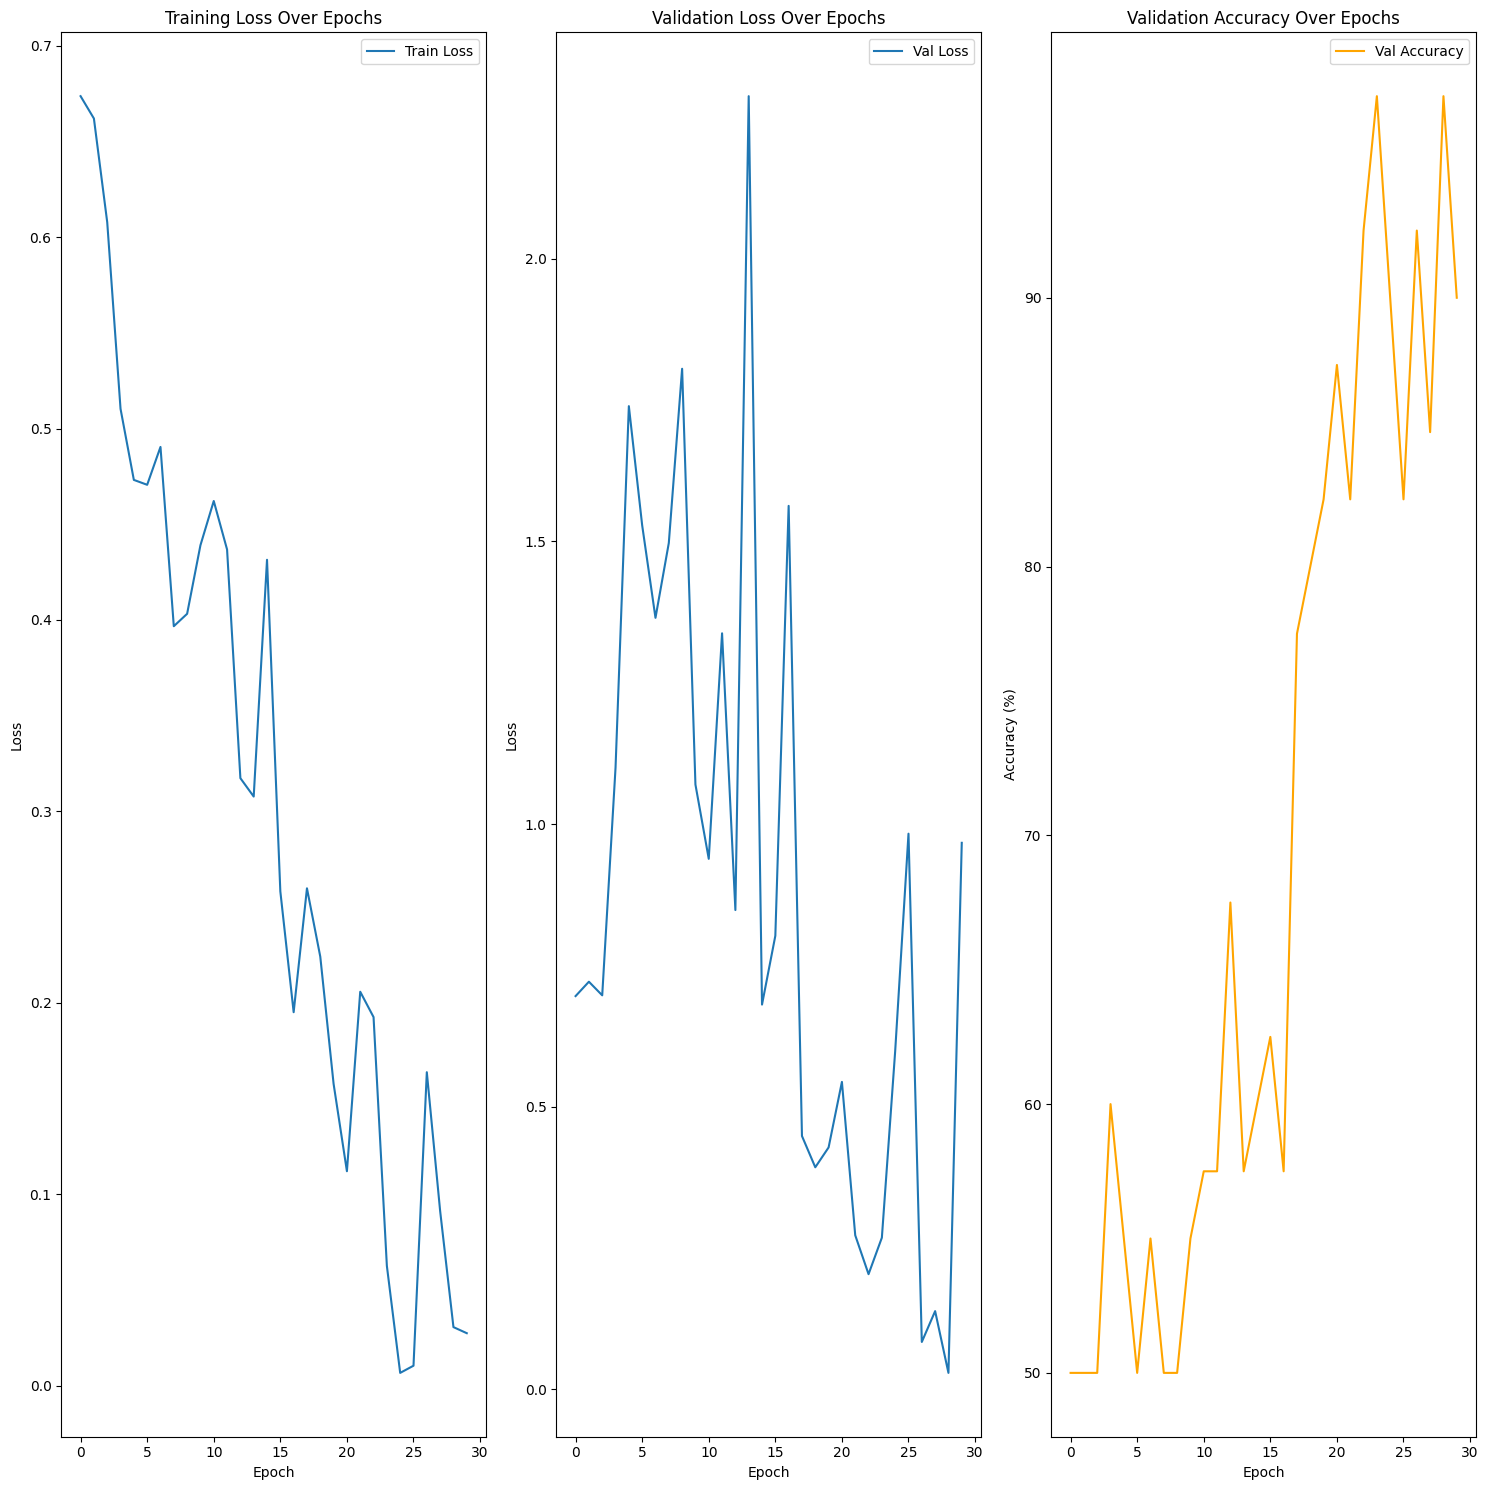

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.plot(train_losses,label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1,3,2)
plt.plot(val_losses,label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

plt.subplot(1,3,3)
plt.plot(val_accuracies,label='Val Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
def load_and_transform_image(image_paths,transform):
    image = Image.open(image_paths).convert("RGB")
    width, height = image.size

    left = (width - 128) / 2
    top = (height - 128) / 2
    right = (width + 128) / 2
    bottom = (height + 128) / 2

    image_cropped = image.crop((left,top,right,bottom))
    return transform(image_cropped), image_cropped

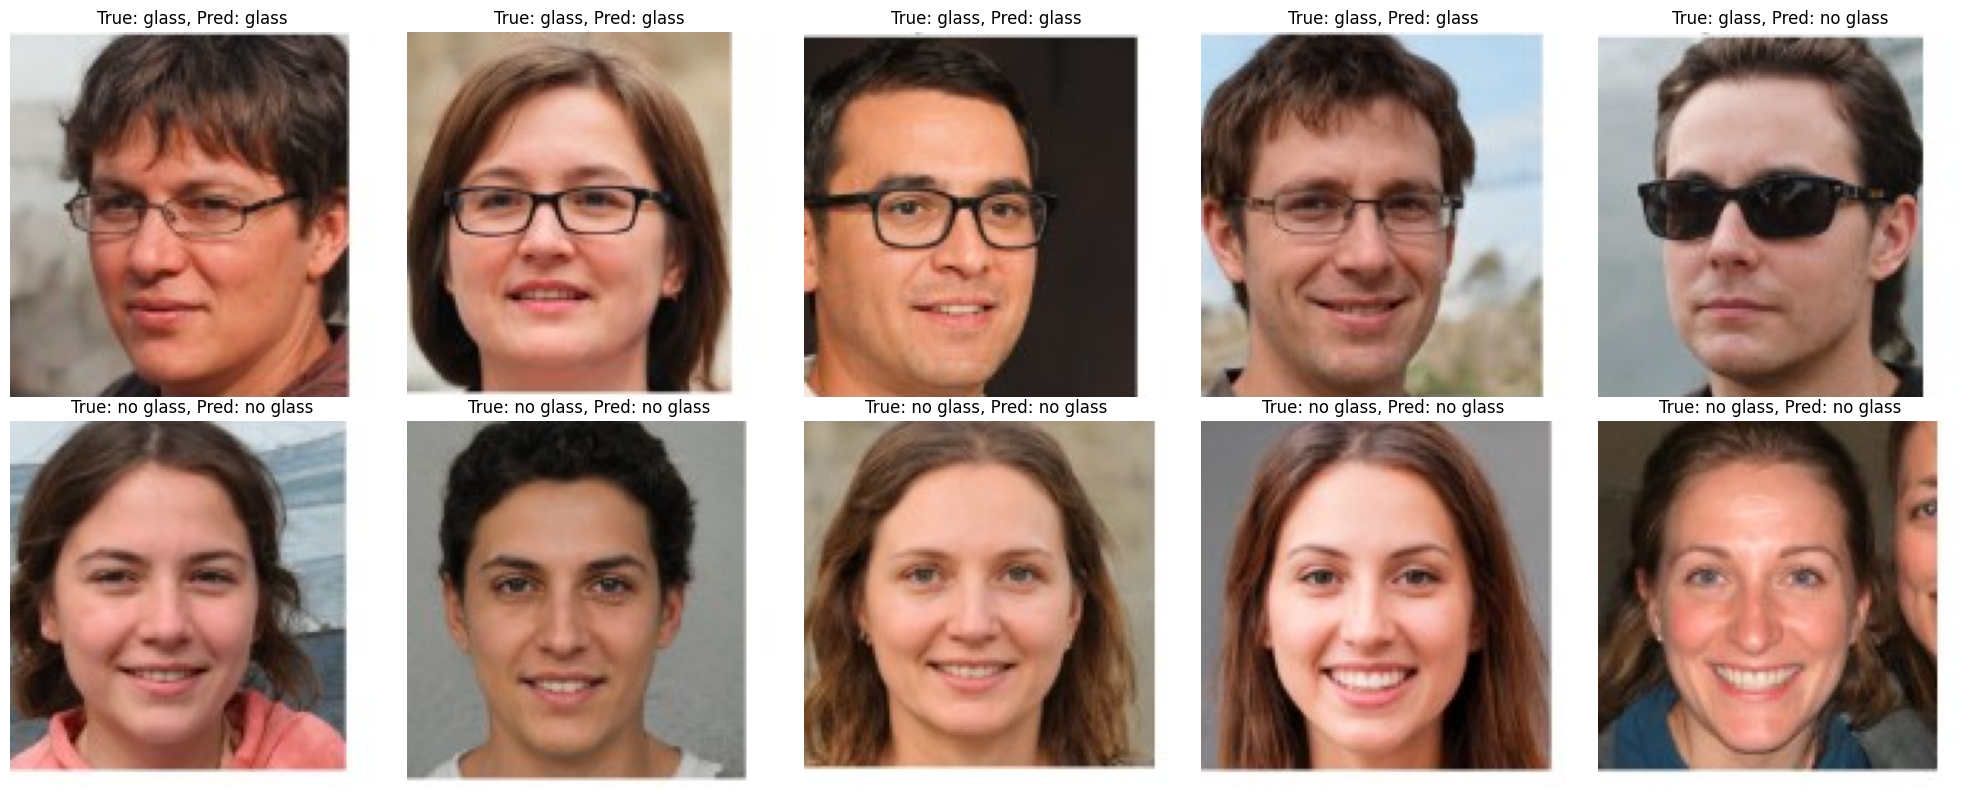

In [23]:
class_folders = {
    'glass':'/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/glasses',
    'no glass':'/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/DL/data/glass/test/noglasses'
}

plt.figure(figsize=(20, 8))

counter = 1

for class_name, folder_path in class_folders.items():
    image_paths = glob.glob(os.path.join(folder_path, "*"))
    selected_paths = image_paths[:5]
    for image_path in selected_paths:
        image, image_cropped = load_and_transform_image(image_path, transform)
        image_unsqueeze = image.unsqueeze(0)    # 차원 추가
        image_unsqueeze =image_unsqueeze.to(device)
        output = model(image_unsqueeze)
        _, predicted = torch.max(output, 1)
        prediction = 'glass' if predicted.item() == 0 else 'no glass'

        plt.subplot(2, 5, counter)
        plt.imshow(image_cropped)
        plt.title(f'True: {class_name}, Pred: {prediction}')
        plt.axis('off')
        counter += 1
plt.tight_layout()
plt.show()

